# Relationship between Group Averaging and Group Convolution (Lifting)

Writte by Wenhan Gao, Ph.D. student at Stony Brook University.

https://wenhangao21.github.io/

If you have any questions, feel free to reach out.



## Lifting Correlation and Group Averaging Demonstration with $p_4$ Group

### Initialization and Helper functions

In [2]:
from scipy.signal import convolve2d
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import camera
from skimage.color import rgb2gray

# Create an input 2D feature and a convolution kernel:
image = camera()[::8,::8]
rotation_multiple = 2 # rotation to the input image, multiples of 90 degrees, e.g. 2 means 180 deg
# Convolution kernel
conv_kernel = np.array([
    [50,  40,  30,  20,  10,   0,  -10],
    [40,  30,  20,  10,   0,  -10,  -20],
    [30,  20,  10,   0,  -10,  -20,  -30],
    [20,  10,   0,  -10,  -20,  -30,  -40],
    [10,   0,  -10,  -20,  -30,  -40,  -50],
    [ 0,  -10,  -20,  -30,  -40,  -50,  -60],
    [-10, -20,  -30,  -40,  -50,  -60,  -70]
])/50


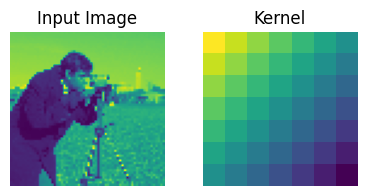

In [3]:
# Plot the image and kernel
plt.figure(figsize=(4, 2))
plt.subplot(121)
plt.imshow(image)
plt.title('Input Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(conv_kernel, interpolation='nearest')
plt.title('Kernel')
plt.axis('off')
plt.tight_layout()
plt.show()


In [4]:
import matplotlib.pyplot as plt

def plot_group_features(features):
    """
    Plot a series of features corresponding to 0°, 90°, 180°, and 270° rotations on the group space.

    Parameters:
    - features (list or numpy.ndarray): A list or 3D array of feature maps to be plotted.
    """
    titles = ['0°', '90°', '180°', '270°']  # Fixed titles for the four rotations
    plt.figure(figsize=(8, 2))
    for i, feature in enumerate(features):
        plt.subplot(1, len(features), i + 1)
        plt.imshow(feature, cmap='viridis')  # Adjust colormap as needed
        plt.title(titles[i])
        plt.axis('off')  # Optional: Removes axis ticks
    plt.tight_layout()
    plt.show()


### $p_4$ Group

The $p_4$ group can be described as a semi-direct product:

$$
P_4=C_4 \ltimes \mathbb{Z}^2,
$$

where:
- $C_4$ : The cyclic group of order 4 representing the rotational symmetries.
- $\mathbb{Z}^2$ : The group of translations in the plane (not $\mathbb{R}^2$ because images are discrete).

### Lifting Correlation and  Group Averaging

Recall the definition of lifting correlation

$$[k \star f](g)=\int_{\mathbb{R}^{\mathrm{d}}} k\left(g^{-1} y\right) f(y) d y=\left(L_g \cdot k\right) \star f .$$

If we add the projection layer (averaging pooling layer) immediately, we have:

$$\frac{1}{|G|} \sum_{g \in G}[k \star f](g)=\frac{1}{|G|} \sum_{g \in G} \int_{\mathbb{R}^{\mathrm{d}}} k\left(g^{-1} y\right) f(y) d y= \frac{1}{|G|} \sum_{g \in G} \left(L_g \cdot k\right) \star f .$$

Group averaing is essentially the same:

$$\langle\Phi\rangle_G(f)=\mathbb{E}_{g \sim \nu} L_g \cdot\left[k \star\left(L_g^{-1} \cdot f\right)\right]=\frac{1}{|G|} \sum_{g \in G} L_g \cdot\left[k \star\left(L_g^{-1} \cdot f\right)\right]=\frac{1}{|G|} \sum_{g \in G}\left(L_g \cdot k\right) \star f .$$

In [8]:
def lift_correlation(image, kernel):
    """
    Apply lifting correlation/convolution on an image.

    Parameters:
    - image (numpy.ndarray): The input image as a 2D array, size (s,s)
    - conv_kernel (numpy.ndarray): The convolution kernel as a 2D array.

    Returns:
    - numpy.ndarray: Resulting feature maps after lifting correlation, size (|G|,s,s)
    """
    results = []
    for i in range(4):  # apply rotations to the kernel and convolve with the input
        rotated_kernel = np.rot90(conv_kernel, i)
        result = convolve2d(image, rotated_kernel, mode='same', boundary='symm')
        results.append(result)
    return np.array(results)

In [16]:
def group_averaging(image, kernel):
    """
    Apply group averaging on an image.

    Parameters:
    - image (numpy.ndarray): The input image as a 2D array, size (s,s)
    - conv_kernel (numpy.ndarray): The convolution kernel as a 2D array.

    Returns:
    - numpy.ndarray: Resulting feature maps before averaging, size (|G|,s,s)
    """
    results = []
    for i in range(4):  # apply inverse rotations to the images and convolve with the kernel
        rotated_image = np.rot90(image, 4-i)
        result = np.rot90(convolve2d(rotated_image, kernel, mode='same', boundary='symm'), i)
        results.append(result)
    return np.array(results)

In [17]:
features_lifting = lift_correlation(image, conv_kernel)
features_ga = group_averaging(image, conv_kernel)

Feature maps from lifting correlation: 


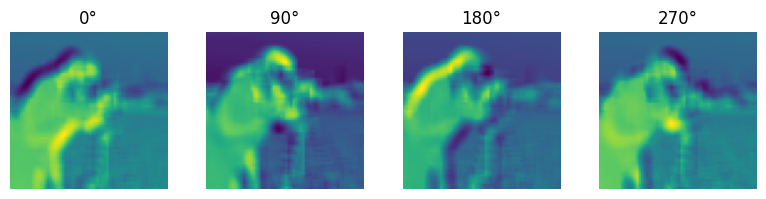

Feature maps from group averaging, but before averaging: 


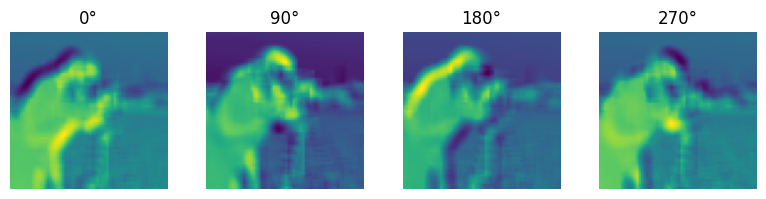

In [18]:
print("Feature maps from lifting correlation: ")
plot_group_features(features_lifting)
print("Feature maps from group averaging, but before averaging: ")
plot_group_features(features_ga)

In [20]:
if np.allclose(features_lifting, features_ga):
    print("The feature maps are exactly the same.")
else:
    print("The feature maps are not exactly the same.")

The feature maps are exactly the same.
